Иванов Денис 

ASB-10

Домашнее задание # 2

Использовать арсенал статистических критериев для проверки следующих гипотез:
- Средняя стоимость lastsoldprice у типа недвижимости (usecode) Condominium отличается от SingleFamily
- Средняя оценочная стоимость zestimate отличается от реальной lastsoldprice

Проверить любую выборку (из тех, что использовались в п. 5 #  в задании нет п. 5)
на равенство средних с нормальным распределением.

In [1]:
import pandas as pd
import numpy as np

from scipy import stats as sts
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import spearmanr

import statistics

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import Image

In [2]:
# загружаем датасет
data = pd.read_excel('san_francisco_houses.xlsx')
data.head()

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2,1043,02/17/2016,1300000,37.778705,-122.412635,South of Market,4,Condominium,2007,1167508,"975,700",94103,83152781
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1,903,02/17/2016,750000,37.777641,-122.393417,South of Market,3,Condominium,2004,823719,"975,700",94107,69819817
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3,1425,02/17/2016,1495000,37.759198,-122.396516,Potrero Hill,6,Condominium,2003,1708594,"1,277,600",94107,64972847
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3,2231,02/17/2016,2700000,37.761886,-122.396769,Potrero Hill,10,SingleFamily,1927,2411236,"1,277,600",94107,15149489
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3,1300,02/17/2016,1530000,37.740795,-122.413453,Bernal Heights,4,SingleFamily,1900,1918539,"1,248,000",94110,15161978


Проверка гипотезы:
Средняя стоимость lastsoldprice у типа недвижимости (usecode) Condominium отличается от SingleFamily

In [5]:
# пределяем выборки и их базовые статистики

# Condominium_price
Condominium_price  = data.lastsoldprice[data.usecode == 'Condominium']
print (Condominium_price.describe().round(2))
print('Стандартное отклонение = %.3f' % (statistics.pstdev(Condominium_price)))
print('По тесту Шапиро - p = ', shapiro(Condominium_price)[1])

count       4802.00
mean     1083701.40
std       651837.48
min          600.00
25%       700000.00
50%       925000.00
75%      1300000.00
max      8100000.00
Name: lastsoldprice, dtype: float64
Стандартное отклонение = 651769.601
По тесту Шапиро - p =  0.0


In [6]:
# SingleFamily_price

SingleFamily_price = data.lastsoldprice[data.usecode == 'SingleFamily']
print(SingleFamily_price.describe().round(2))
print('Стандартное отклонение = %.3f' % (statistics.pstdev(SingleFamily_price)))
print('По тесту Шапиро - p = ', shapiro(SingleFamily_price)[1])

count        5803.00
mean      1408017.87
std       1283274.60
min          3000.00
25%        750000.00
50%       1045000.00
75%       1595000.00
max      23889000.00
Name: lastsoldprice, dtype: float64
Стандартное отклонение = 1283164.022
По тесту Шапиро - p =  0.0


C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Проверка на равенство средних с нормальным распределением:
Средняя стоимость lastsoldprice у типа недвижимости (usecode) Condominium отличается от SingleFamily

In [12]:
print('Согласно t-тесту : stat=%.3f, p=%.3f' % (sts.ttest_ind(Condominium_price, SingleFamily_price)))

# Если бы распределение было нормальным,  тогда 

Согласно t-тесту : stat=-15.898, p=0.000


In [148]:
# так как по формальным признакам распределение не нормально,
# дополнительно проверяем схожесть выборок по тесту Манна Уитни
print('Согласно тесту Манна Уитни : stat = %.3f, p = %.3f' % (mannwhitneyu(Condominium_price, SingleFamily_price)))

Согласно тесту Манна Уитни : stat = 11910878.000, p = 0.000


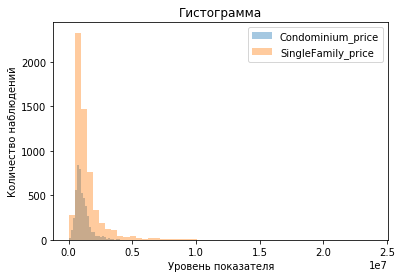

In [19]:
sns.distplot(Condominium_price, kde=False)
sns.distplot(SingleFamily_price, kde=False)
plt.xlabel('Уровень показателя')
plt.ylabel('Количество наблюдений')
plt.legend(['Condominium_price', 'SingleFamily_price'])
plt.title('Гистограмма')
plt.show()

Проведенные статистические тесты свидетельствуют о наличии статистических различий между рассматриваемыми выборками,
хотя гистограмма и демонстрирует некоторое сходство  распределения

Проверка гипотезы:
Средняя оценочная стоимость zestimate отличается от реальной lastsoldprice

# пределяем выборки и их базовые статистики
# Lastoldprice

Lastoldprice  = data.lastsoldprice
print (Lastoldprice.describe().round(2))
print('Стандартное отклонение = %.3f' % (statistics.pstdev(Lastoldprice)))
print('По тесту Шапиро - p = ', shapiro(Lastoldprice)[1])

In [16]:
# Zestimate
Zestimate  = data.zestimate
print (Zestimate.describe().round(2))
print('Стандартное отклонение = %.3f' % (statistics.pstdev(Zestimate)))
print('По тесту Шапиро - p = ', shapiro(Zestimate)[1])

count       11330.00
mean      1565695.26
std       1229417.07
min        432385.00
25%        905237.50
50%       1230758.00
75%       1731169.75
max      15533253.00
Name: zestimate, dtype: float64
Стандартное отклонение = 1229362.812
По тесту Шапиро - p =  0.0


In [17]:
stattt, ptt = sts.ttest_ind(Lastoldprice, Zestimate)
stattt, ptt
# Если бы распределение было нормальным

(-19.93048193633458, 1.2484003889039498e-87)

In [18]:
# так как по формальным признакам распределение не нормально,
# дополнительно проверяем схожесть выборок по тесту Манна Уитни
statm, pm = mannwhitneyu(Lastoldprice, Zestimate)
statm, pm

(48719805.5, 7.494642636548625e-217)

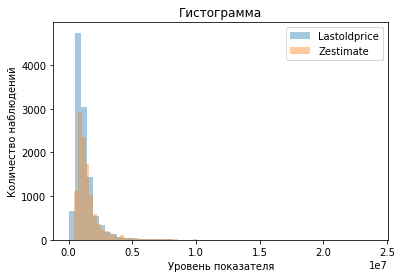

In [130]:
sns.distplot(Lastoldprice, kde=False)
sns.distplot(Zestimate, kde=False)
plt.xlabel('Уровень показателя')
plt.ylabel('Количество наблюдений')
plt.legend(['Lastoldprice', 'Zestimate'])
plt.title('Гистограмма')
plt.show()

Проведенные статистические тесты свидетельствуют о наличии статистических различий между рассматриваемыми выборками, хотя гистограмма и демонстрирует некоторое сходство распределения